# 1. 기본 세팅

In [197]:
import pandas as pd
import numpy as np

from datetime import date
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [144]:
df = pd.read_csv('data/reg.csv')
df.head()

,식당,방송,방영전,방영후,증가,서울,방영월
0,136생고기,생생정보,4,45,41,0,3
1,3일한우국밥,생생정보,35,51,16,1,3
2,가람떡갈비,맛있는녀석들,21,50,29,1,1
3,가마솥 족발,생생정보,31,106,75,0,3
4,가마솥손두부,생생정보,11,45,34,1,4


In [145]:
df_tidy = pd.read_csv('data/reg_tidy.csv')
df_tidy.head()

,식당,방영전,방영후,증가,방영월,방송_맛있는녀석들,방송_생생정보,방송_수요미식회,서울_0,서울_1,계절_가을,계절_겨울,계절_봄,계절_여름
0,136생고기,4,45,41,3,0,1,0,1,0,0,0,1,0
1,3일한우국밥,35,51,16,3,0,1,0,0,1,0,0,1,0
2,가람떡갈비,21,50,29,1,1,0,0,0,1,0,1,0,0
3,가마솥 족발,31,106,75,3,0,1,0,1,0,0,0,1,0
4,가마솥손두부,11,45,34,4,0,1,0,0,1,0,0,1,0


# 2. 필요한 컬럼과 데이터프레임 만들기

In [146]:
df['증가율'] = 100 * (df['방영후'] / df['방영전'])
df.head()

,식당,방송,방영전,방영후,증가,서울,방영월,증가율
0,136생고기,생생정보,4,45,41,0,3,1125.000000
1,3일한우국밥,생생정보,35,51,16,1,3,145.714286
2,가람떡갈비,맛있는녀석들,21,50,29,1,1,238.095238
3,가마솥 족발,생생정보,31,106,75,0,3,341.935484
4,가마솥손두부,생생정보,11,45,34,1,4,409.090909


In [147]:
df['방영전_log'] = np.log(df['방영전'])
df['증가율_log'] = np.log(df['증가율'])
df['증가_log'] = np.log(df['증가'])
df.head()

,식당,방송,방영전,방영후,증가,서울,방영월,증가율,방영전_log,증가율_log,증가_log
0,136생고기,생생정보,4,45,41,0,3,1125.000000,1.386294,7.025538,3.713572
1,3일한우국밥,생생정보,35,51,16,1,3,145.714286,3.555348,4.981648,2.772589
2,가람떡갈비,맛있는녀석들,21,50,29,1,1,238.095238,3.044522,5.472671,3.367296
3,가마솥 족발,생생정보,31,106,75,0,3,341.935484,3.433987,5.834622,4.317488
4,가마솥손두부,생생정보,11,45,34,1,4,409.090909,2.397895,6.013937,3.526361


In [148]:
df1 = df[['방송','식당','방영전','방영전_log','방영후','증가','증가_log','증가율','증가율_log']]
df1.head()

,방송,식당,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
0,생생정보,136생고기,4,1.386294,45,41,3.713572,1125.000000,7.025538
1,생생정보,3일한우국밥,35,3.555348,51,16,2.772589,145.714286,4.981648
2,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671
3,생생정보,가마솥 족발,31,3.433987,106,75,4.317488,341.935484,5.834622
4,생생정보,가마솥손두부,11,2.397895,45,34,3.526361,409.090909,6.013937


In [149]:
mashit_df = df1.loc[df1['방송'] == '맛있는녀석들']
mashit_df.head()

,방송,식당,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
2,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671
10,맛있는녀석들,강촌원조쭈꾸미,7,1.945910,46,39,3.663562,657.142857,6.487901
12,맛있는녀석들,개미집,13,2.564949,20,7,1.945910,153.846154,5.035953
14,맛있는녀석들,개화옥 등심,1,0.000000,8,7,1.945910,800.000000,6.684612
17,맛있는녀석들,건대통골뱅이,12,2.484907,36,24,3.178054,300.000000,5.703782


In [150]:
sangsang_df = df1.loc[df1['방송'] == '생생정보']
sangsang_df.head()

,방송,식당,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
0,생생정보,136생고기,4,1.386294,45,41,3.713572,1125.000000,7.025538
1,생생정보,3일한우국밥,35,3.555348,51,16,2.772589,145.714286,4.981648
3,생생정보,가마솥 족발,31,3.433987,106,75,4.317488,341.935484,5.834622
4,생생정보,가마솥손두부,11,2.397895,45,34,3.526361,409.090909,6.013937
5,생생정보,갈비구락부,36,3.583519,46,10,2.302585,127.777778,4.850293


In [151]:
suyo_df = df1.loc[df1['방송'] == '수요미식회']
suyo_df.head()

,방송,식당,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
6,수요미식회,갓포치유,24,3.178054,74,50,3.912023,308.333333,5.731181
7,수요미식회,강릉감자옹심이,177,5.176150,295,118,4.770685,166.666667,5.115996
9,수요미식회,강촌 숯불 닭갈비,42,3.737670,138,96,4.564348,328.571429,5.794754
13,수요미식회,개화옥,21,3.044522,72,51,3.931826,342.857143,5.837314
15,수요미식회,갯바위,5,1.609438,40,35,3.555348,800.000000,6.684612


In [203]:
df1.shape

(317, 9)

In [219]:
drop_outlier = df1.loc[(df['방영전'] < 200) & (df['증가'] < 150)]
drop_outlier.head()

,방송,식당,방영전,방영전_log,방영후,증가,증가_log,증가율,증가율_log
0,생생정보,136생고기,4,1.386294,45,41,3.713572,1125.000000,7.025538
1,생생정보,3일한우국밥,35,3.555348,51,16,2.772589,145.714286,4.981648
2,맛있는녀석들,가람떡갈비,21,3.044522,50,29,3.367296,238.095238,5.472671
3,생생정보,가마솥 족발,31,3.433987,106,75,4.317488,341.935484,5.834622
4,생생정보,가마솥손두부,11,2.397895,45,34,3.526361,409.090909,6.013937


# 3. scatter plot

### scatter plot 옵션

function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs

In [212]:
plt.rcParams["font.family"] = 'Noto Sans CJK SC'
plt.rcParams["font.size"] = 12

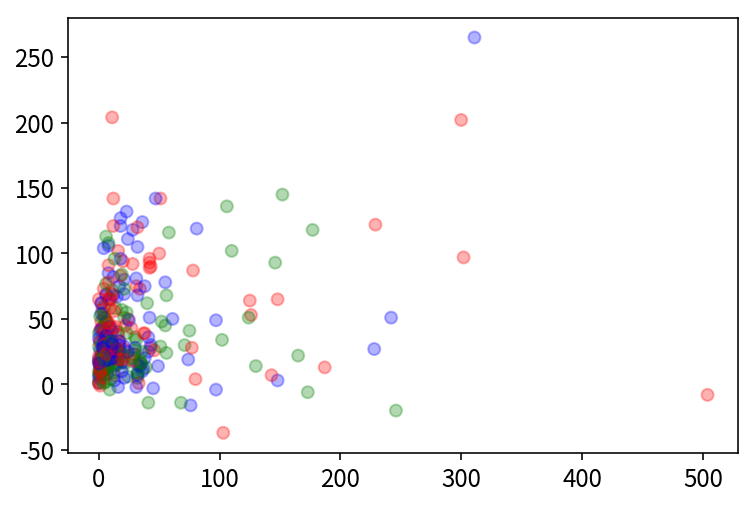

In [213]:
plt.scatter(df1['방영전'],df1['증가'], color =['red','green','blue'], alpha = 0.3)

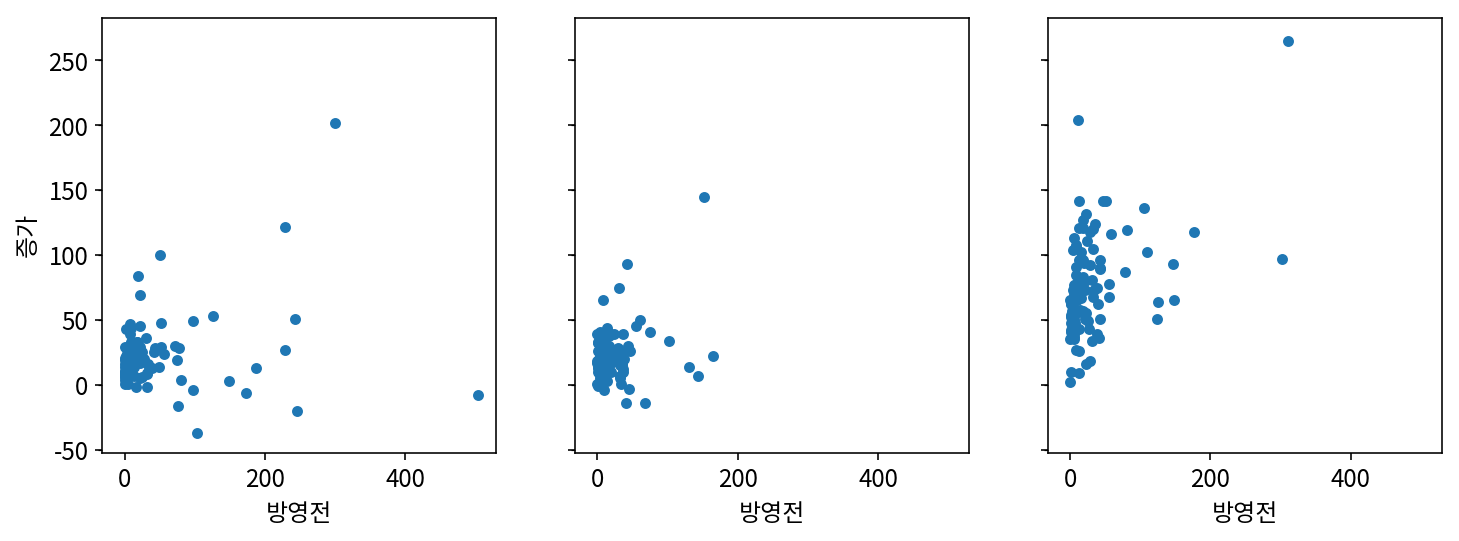

In [228]:
# path = '/Library/Fonts/NotoSansCJKsc-Thin.otf'
# fontprop = fm.FontProperties(fname=fontpath, size=9)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
for ax, (name, subdf) in zip(axes, df1.groupby(by="방송")):
    subdf.plot.scatter(x="방영전", y="증가", ax=ax)
    
# 맛있는녀석들, 생생정보통, 수요미식회

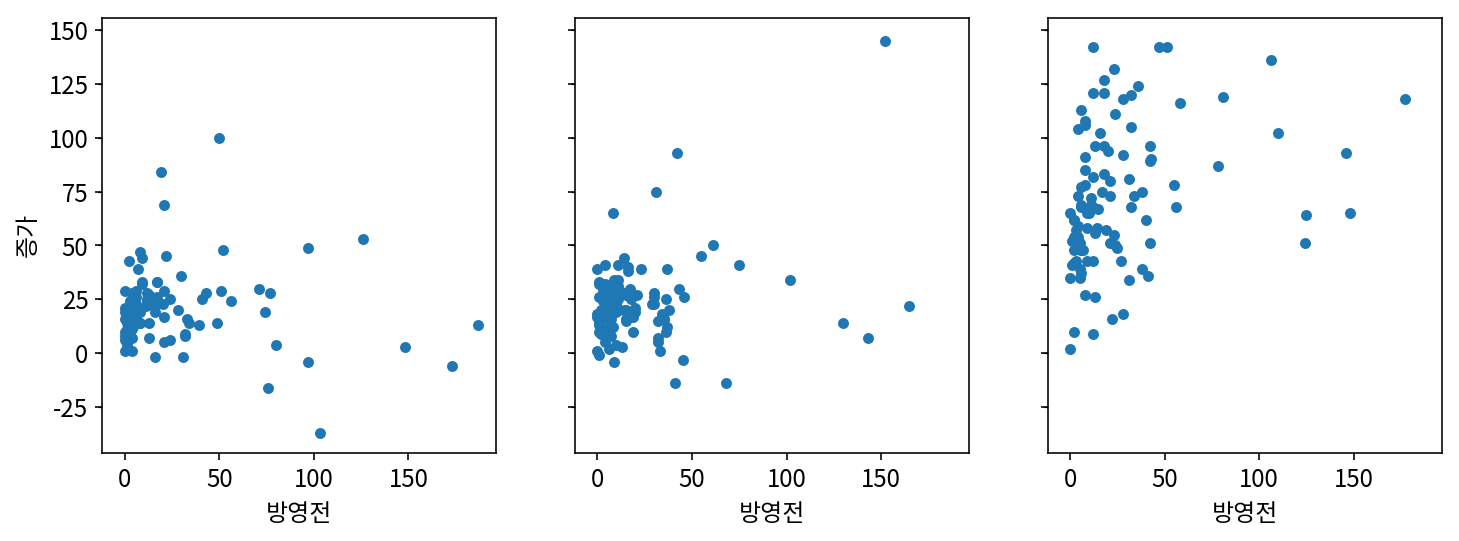

In [224]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)

for ax, (name, subdf) in zip(axes, drop_outlier.groupby(by="방송")):
    subdf.plot.scatter(x="방영전", y="증가", ax=ax)

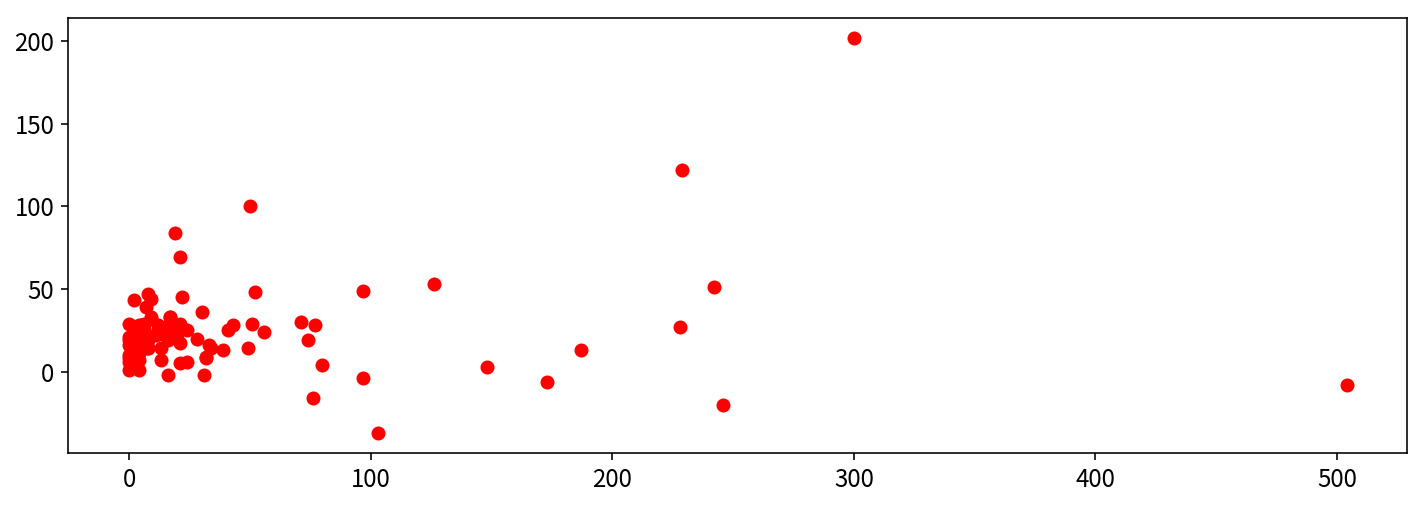

In [181]:
plt.scatter(mashit_df['방영전'],mashit_df['증가'], color = 'red')

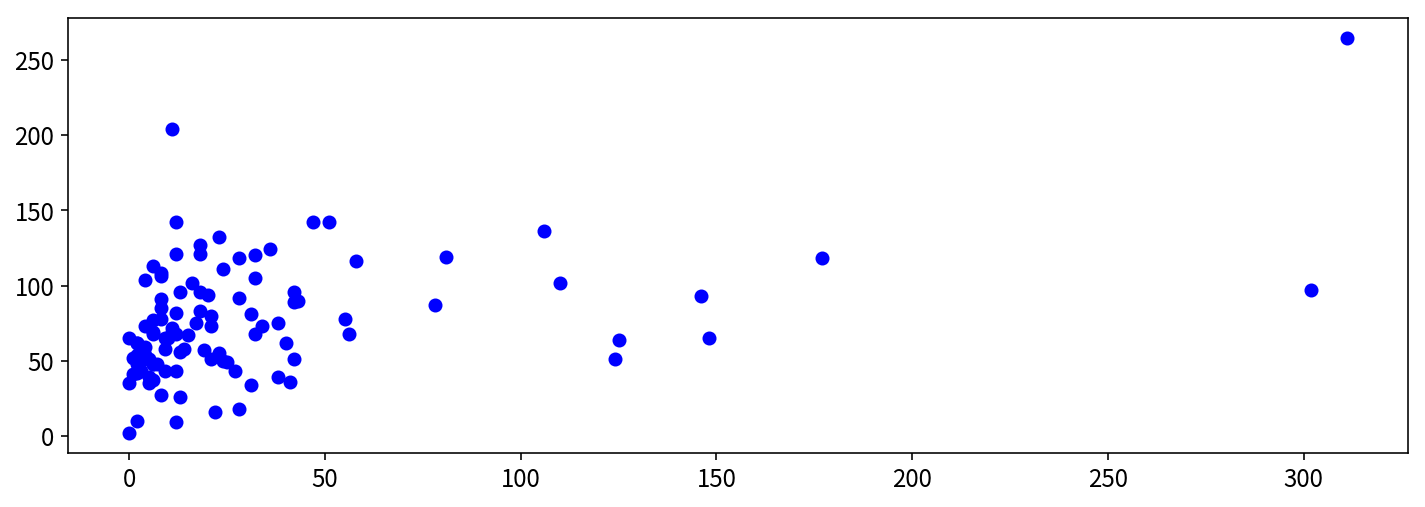

In [182]:
plt.scatter(suyo_df['방영전'],suyo_df['증가'], color = 'blue')

AttributeError: 'DataFrame' object has no attribute 'title'

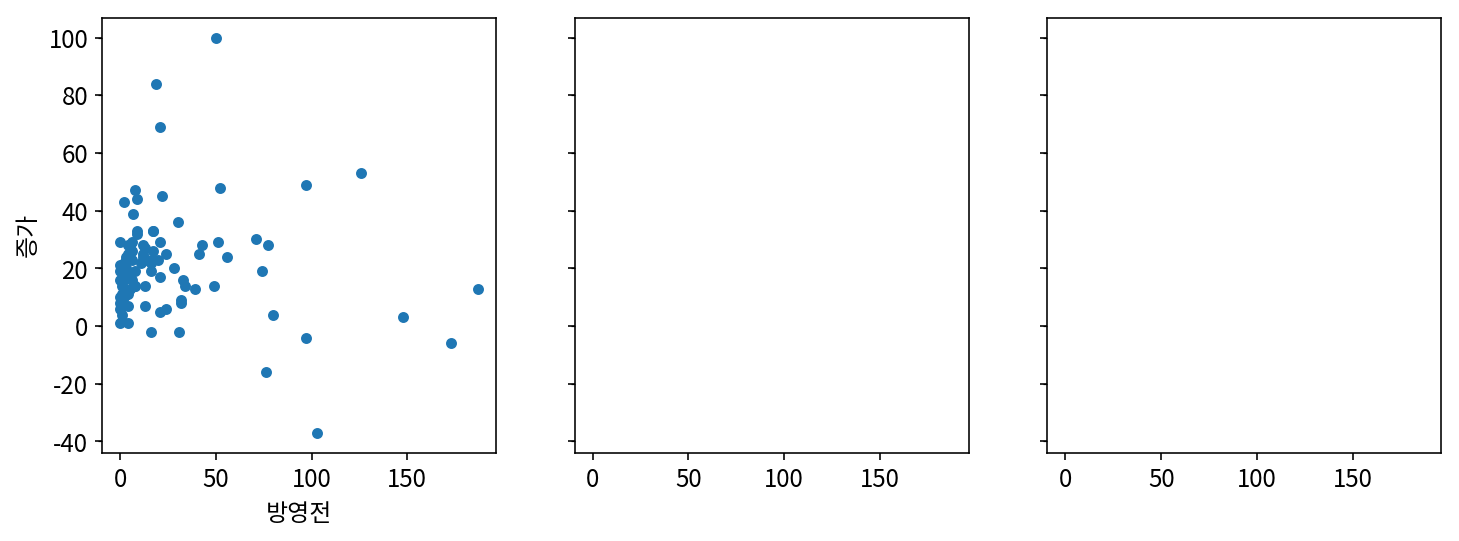

In [227]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)

for ax, (name, subdf) in zip(axes, drop_outlier.groupby(by="방송")):
    subdf.plot.scatter(x="방영전", y="증가", ax=ax)
    subdf.title.set_text('맛있는녀석들', '수요미식회', '생생정보')

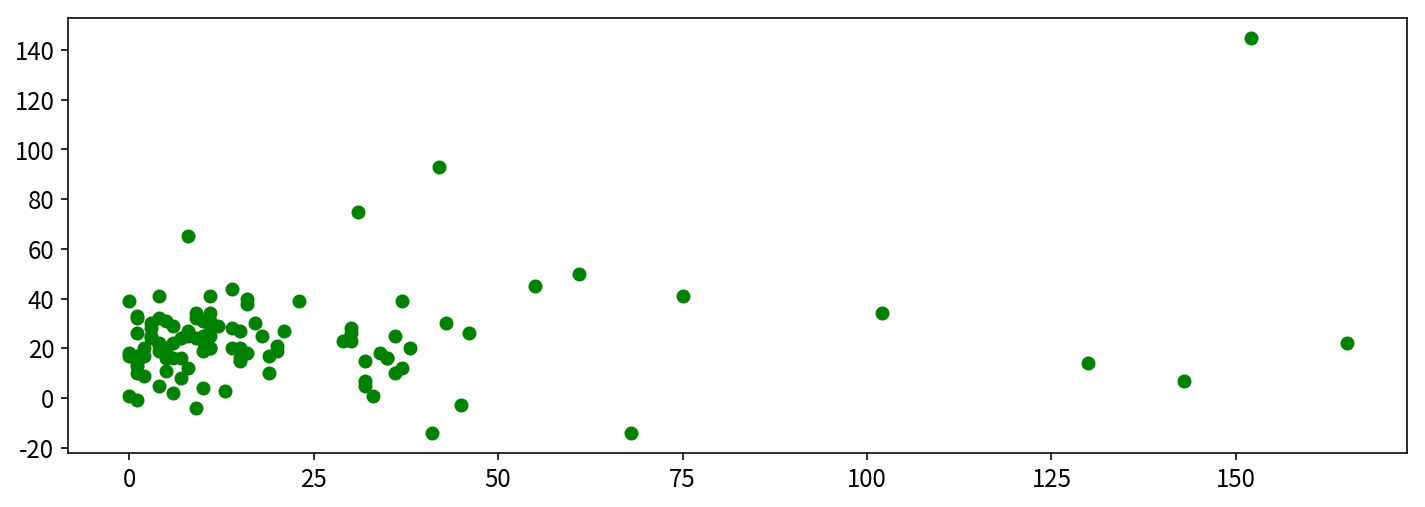

In [183]:
plt.scatter(sangsang_df['방영전'],sangsang_df['증가'], color = 'green')

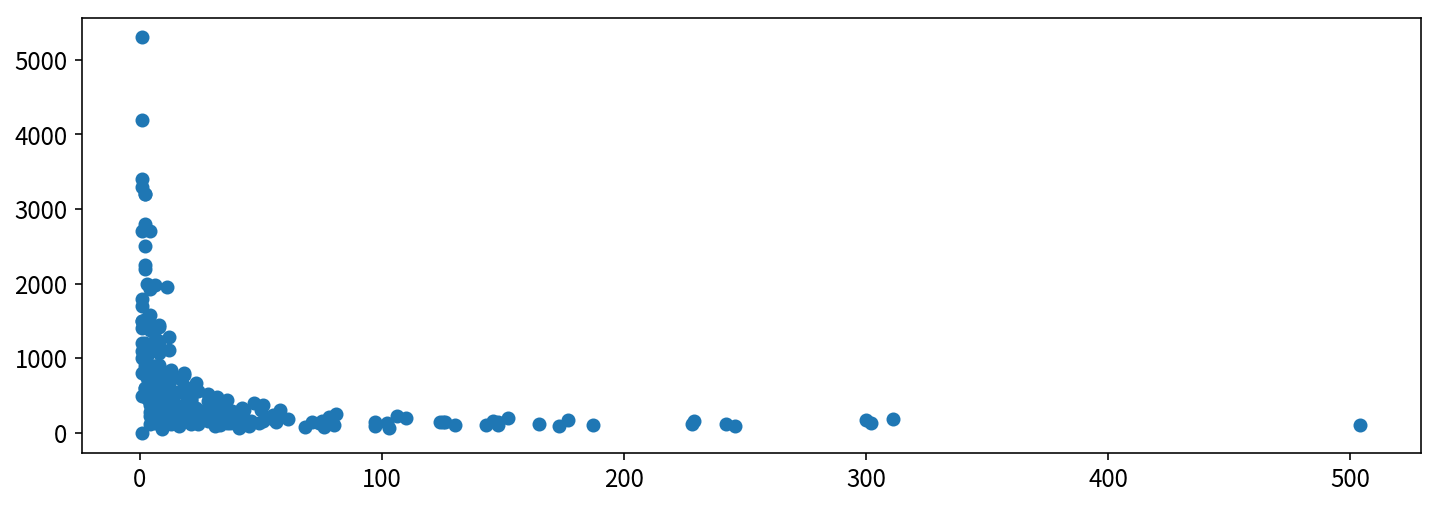

In [184]:
plt.scatter(df1['방영전'],df1['증가율'])

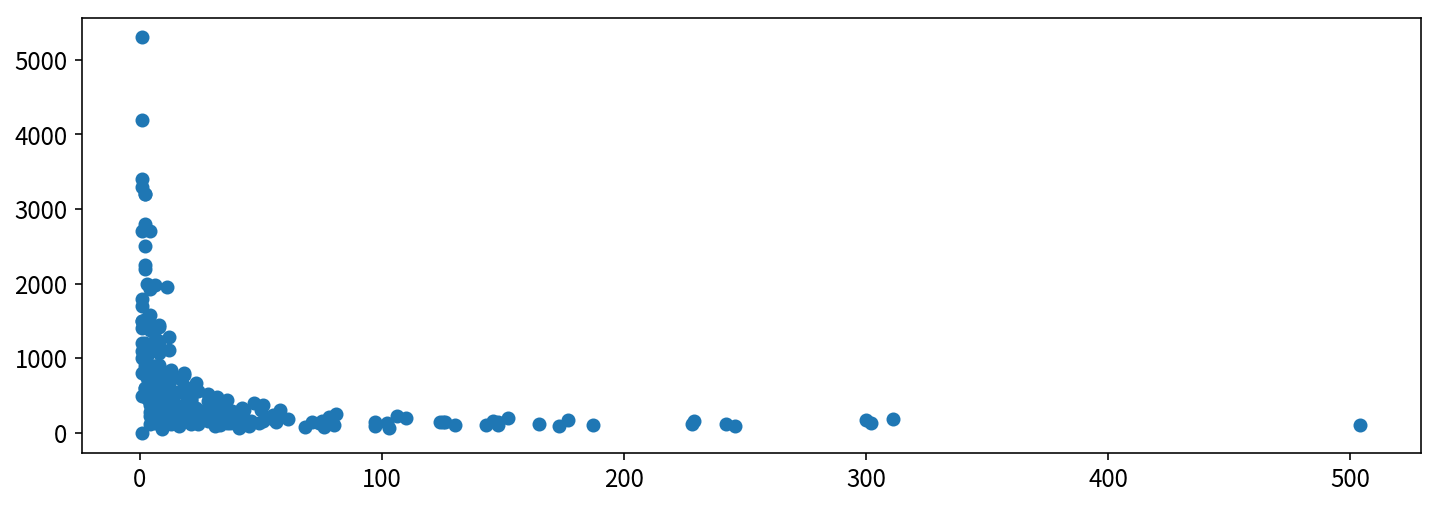

In [186]:
plt.scatter(df1['방영전'],df1['증가율'])

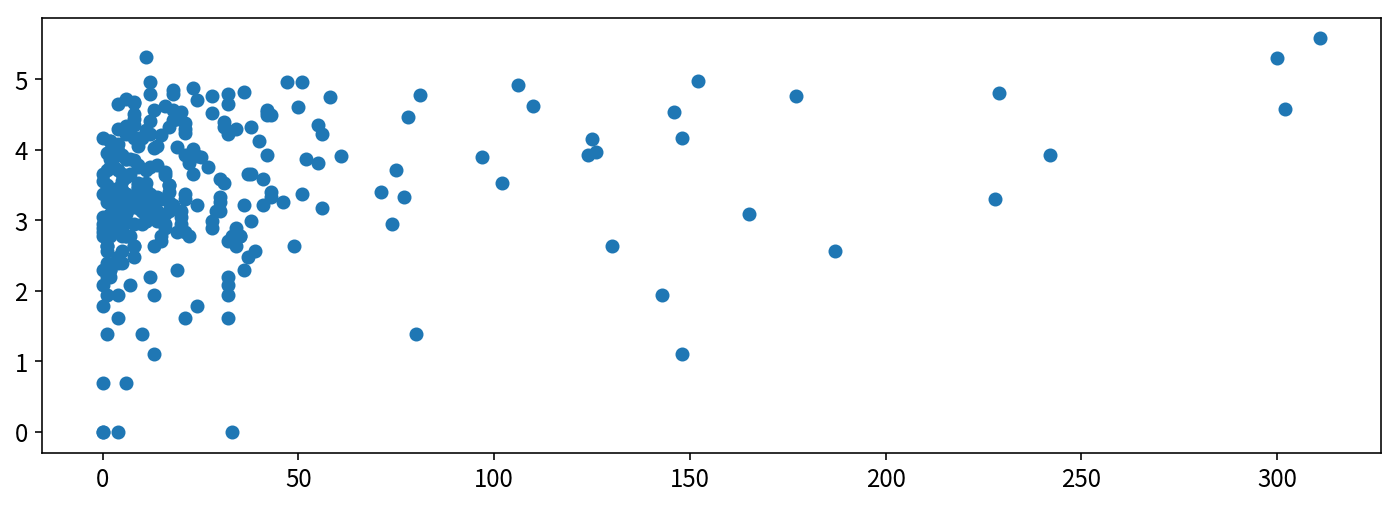

In [187]:
plt.scatter(df1['방영전'],df1['증가_log'])

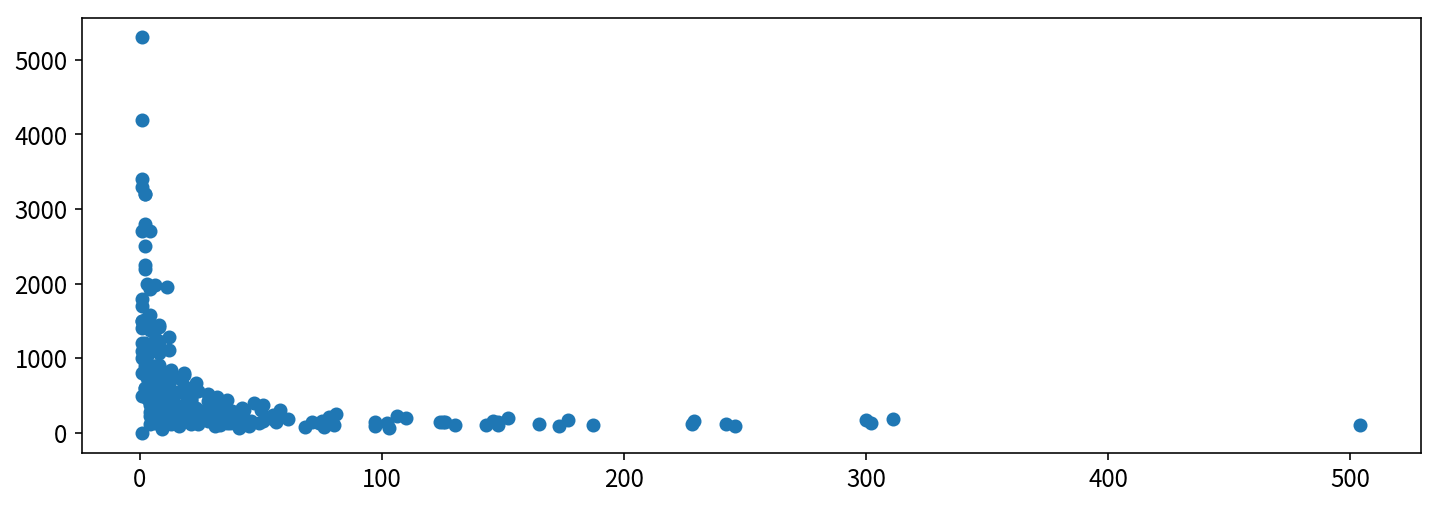

In [188]:
plt.scatter(df1['방영전'],df1['증가율'])

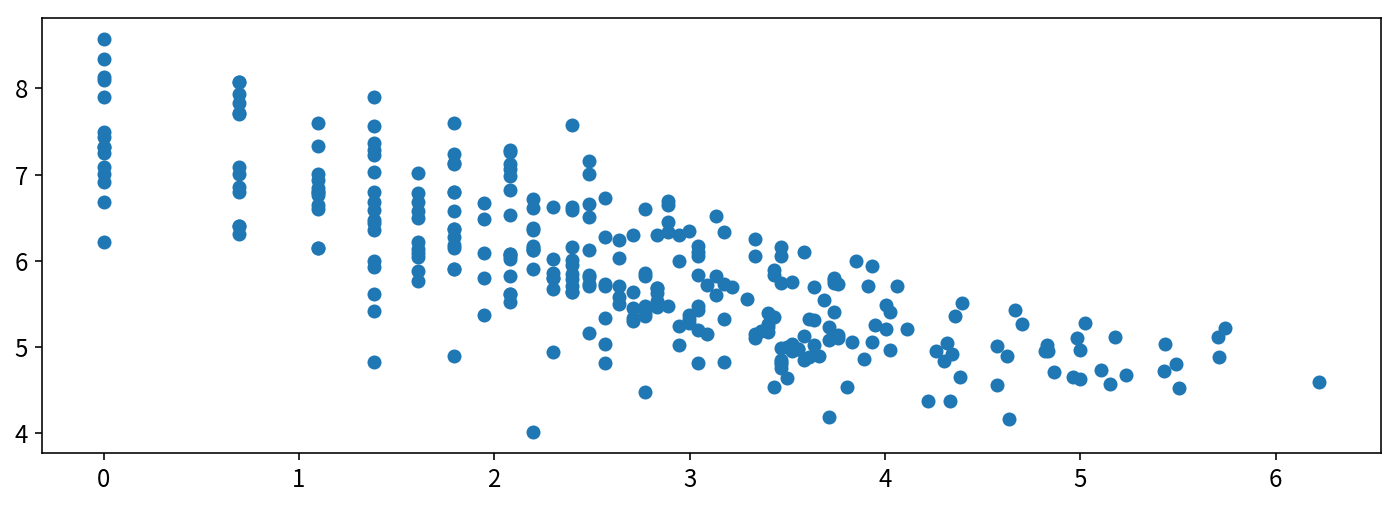

In [189]:
plt.scatter(df1['방영전_log'],df1['증가율_log'])

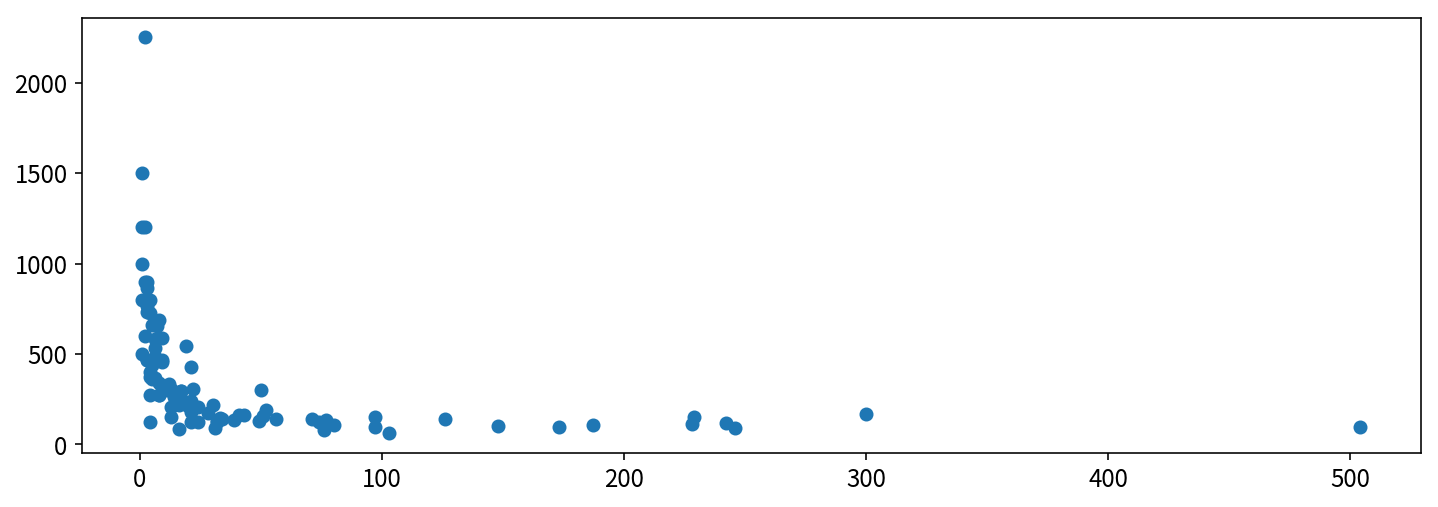

In [190]:
plt.scatter(mashit_df['방영전'],mashit_df['증가율'])

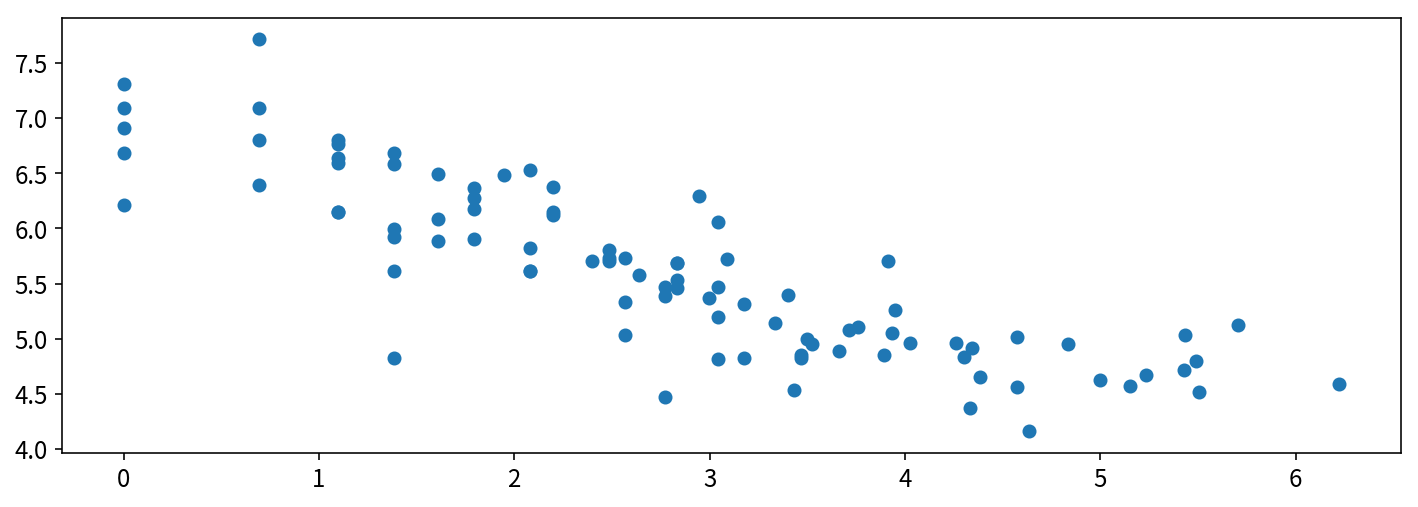

In [191]:
plt.scatter(mashit_df['방영전_log'],mashit_df['증가율_log'])

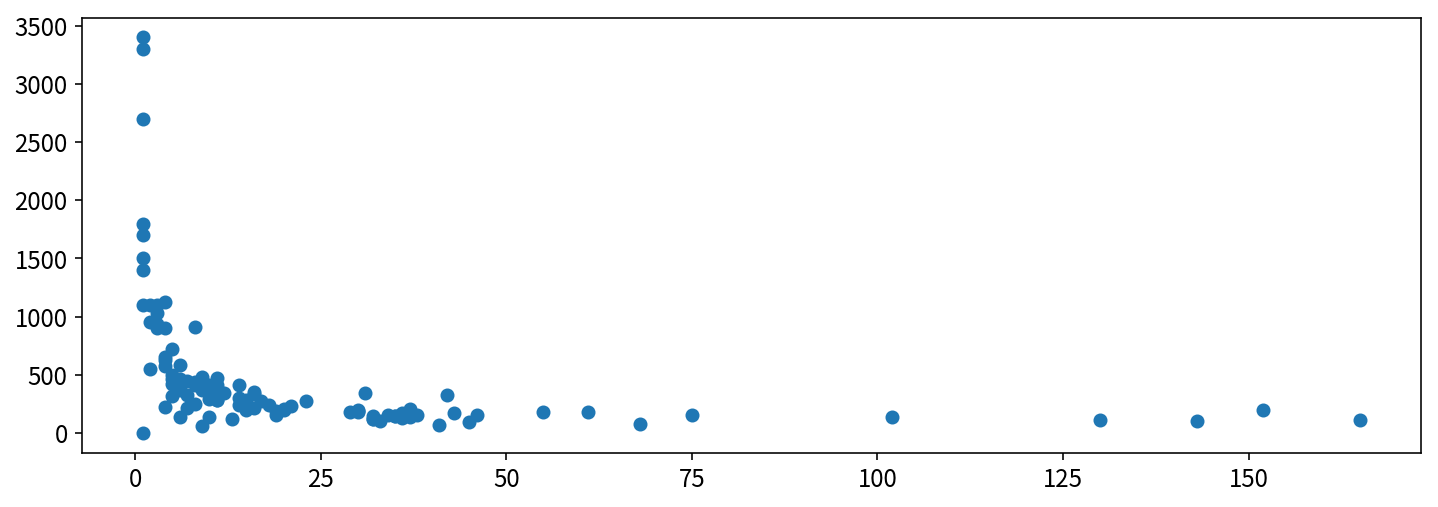

In [192]:
plt.scatter(sangsang_df['방영전'],sangsang_df['증가율'])

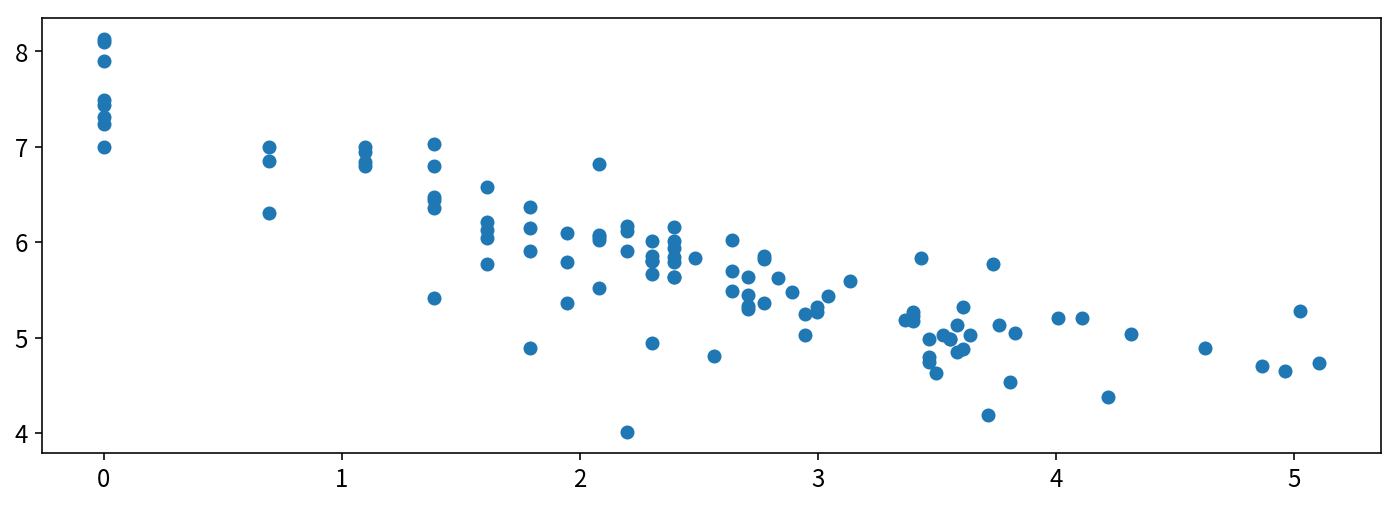

In [193]:
plt.scatter(sangsang_df['방영전_log'],sangsang_df['증가율_log'])

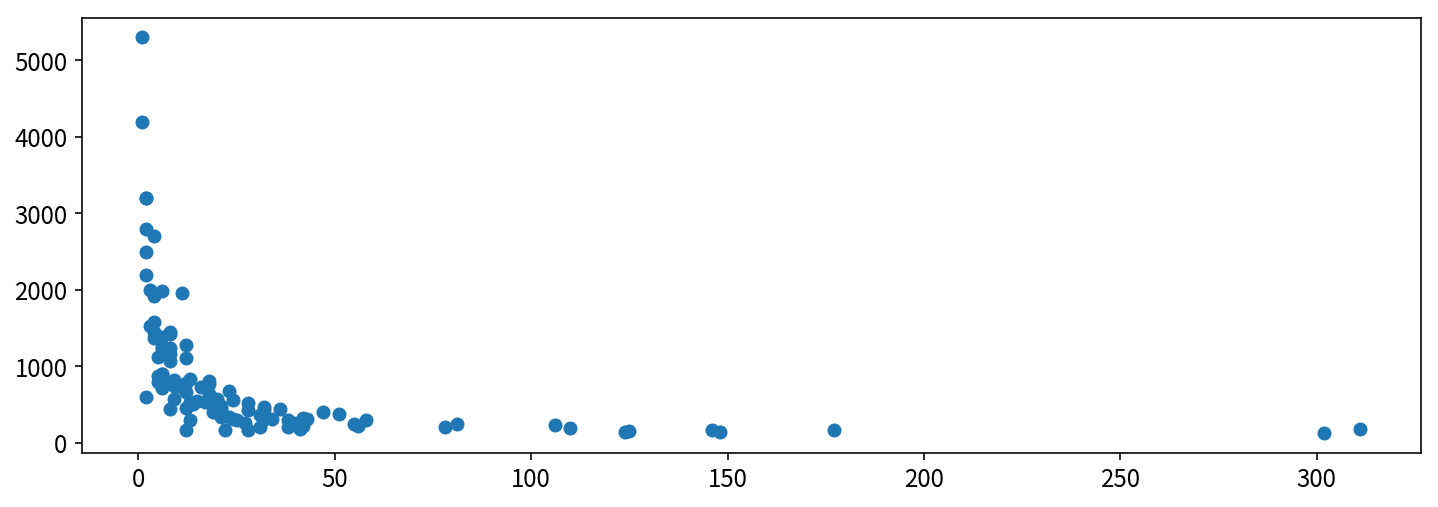

In [194]:
plt.scatter(suyo_df['방영전'],suyo_df['증가율'])

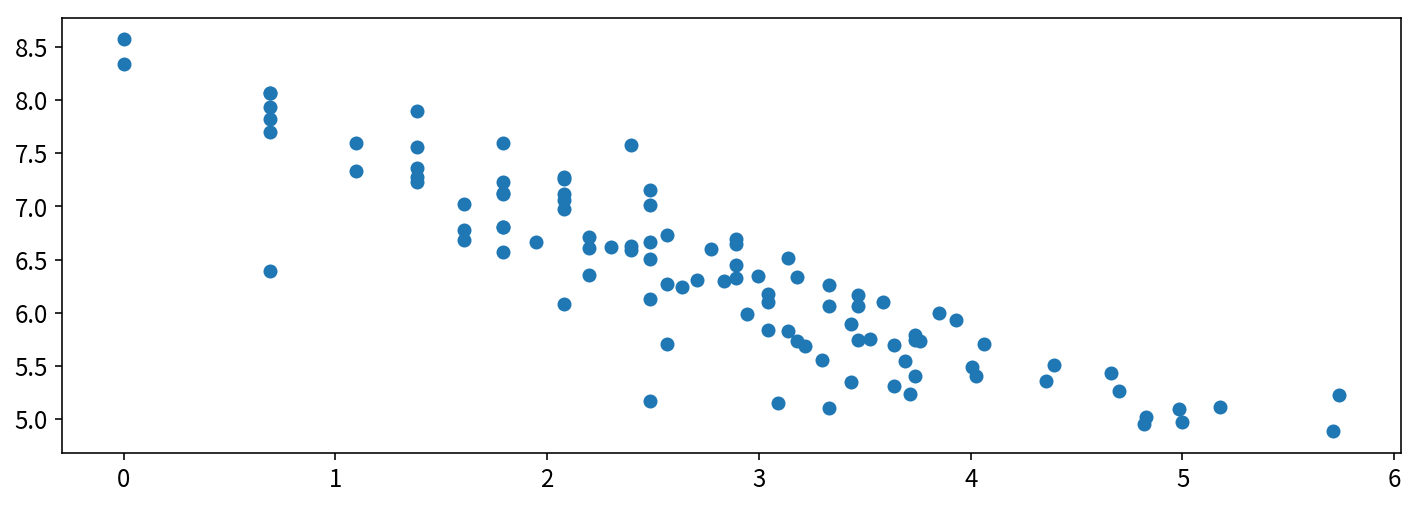

In [195]:
plt.scatter(suyo_df['방영전_log'],suyo_df['증가율_log'])